In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_combined = pd.read_csv("df_combined.csv")

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate features and label
features = df_combined.drop(columns=["Label","Date"])  # All columns except 'Label'
label = df_combined["Label"]  # Only the 'Label' column
date = df_combined["Date"]
# Convert infinite values to NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and replace them with the median of each column
features.fillna(features.median(), inplace=True)

# Apply standard scaling to features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a new DataFrame with scaled features and add the label back
df_combined_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_combined_scaled["Label"] = label.reset_index(drop=True)
df_combined_scaled["Date"] = date.reset_index(drop=True)
# Check the result
print("Data types after scaling and label conversion:")
print(df_combined_scaled.dtypes)
print(df_combined_scaled.head())


Data types after scaling and label conversion:
Dst Port         float64
Protocol         float64
Flow Duration    float64
Tot Fwd Pkts     float64
Tot Bwd Pkts     float64
                  ...   
Idle Std         float64
Idle Max         float64
Idle Min         float64
Label              int64
Date              object
Length: 80, dtype: object
   Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0 -0.517511 -0.464977      -0.013388     -0.030586     -0.036855   
1 -0.519000  2.031057      -0.013388     -0.041438     -0.029615   
2 -0.520764 -0.464977      -0.013389     -0.041438     -0.029615   
3 -0.497496 -0.464977      -0.013389     -0.030586     -0.036855   
4 -0.519000  2.031057      -0.013388     -0.041438     -0.029615   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0        -0.004964        -0.018724        -0.633723        -0.370852   
1        -0.004511        -0.018008        -0.509143         1.400271   
2        -0.004964      

In [4]:
df_combined_scaled['Date'].unique()

array(['2018-02-16', '2018-02-22', '2018-03-02', '2018-02-28',
       '2018-02-15'], dtype=object)

In [5]:
# Group the data by 'Date' and 'Label' and count occurrences
date_label_counts = df_combined_scaled.groupby(['Date', 'Label']).size().unstack(fill_value=0)

# Rename columns for clarity
date_label_counts.columns = ['Benign (0)', 'Anomaly (1)']

# Sort the index by Date if needed
date_label_counts = date_label_counts.sort_index()

# Display the result
print(date_label_counts)

            Benign (0)  Anomaly (1)
Date                               
2018-02-15      523803        52498
2018-02-16      236104       601803
2018-02-22      552220          362
2018-02-28      286185        68495
2018-03-02      401688       286191


In [6]:
df_combined_scaled.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

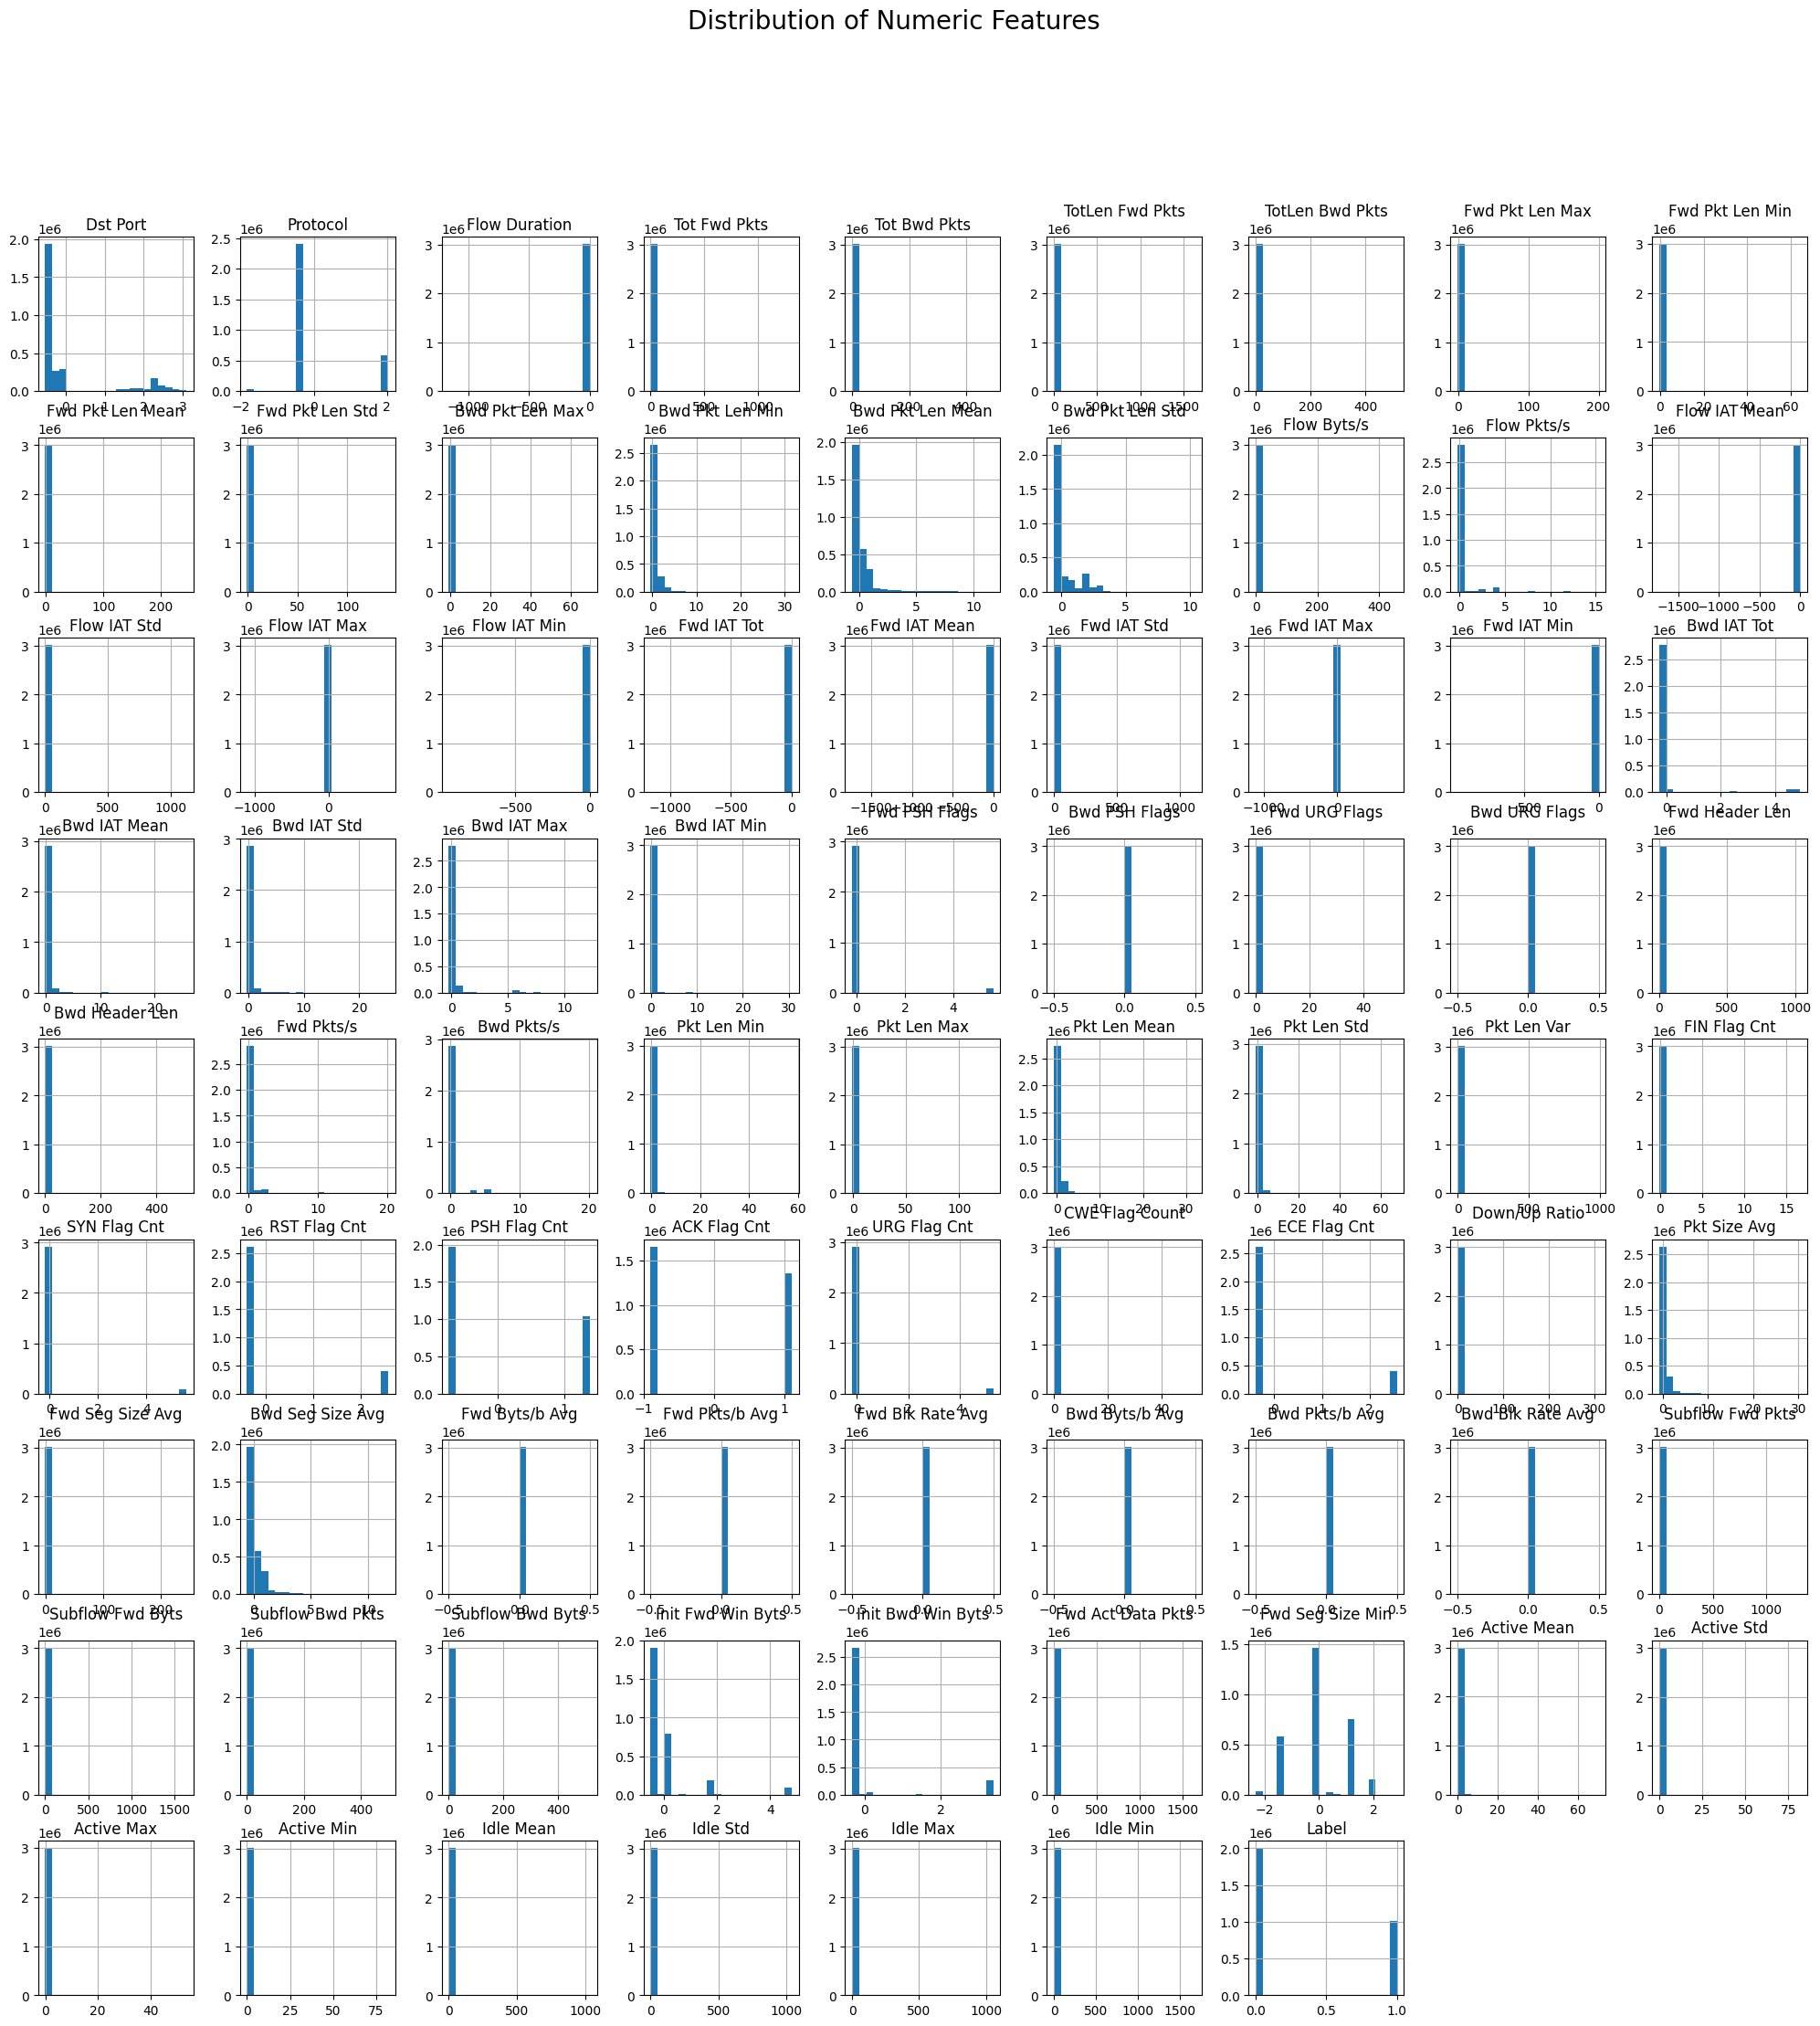

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numeric columns
df_combined_scaled.hist(bins=20, figsize=(25, 25))
plt.suptitle("Distribution of Numeric Features", fontsize=20)
plt.show()


In [10]:
# Compute correlation matrix
# correlation_matrix = df_combined.corr()

# # Plot correlation heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Heatmap")
# plt.show()


Epoch 1/30
704/704 [==============================] - 3s 3ms/step - loss: 0.0137 - val_loss: 5.5057e-04
Epoch 2/30
704/704 [==============================] - 2s 3ms/step - loss: 0.0010 - val_loss: 3.0951e-04
Epoch 3/30
704/704 [==============================] - 2s 3ms/step - loss: 6.7951e-04 - val_loss: 2.1109e-04
Epoch 4/30
704/704 [==============================] - 2s 3ms/step - loss: 5.0949e-04 - val_loss: 1.6229e-04
Epoch 5/30
704/704 [==============================] - 2s 3ms/step - loss: 4.0364e-04 - val_loss: 1.4078e-04
Epoch 6/30
704/704 [==============================] - 2s 3ms/step - loss: 3.3582e-04 - val_loss: 1.2015e-04
Epoch 7/30
704/704 [==============================] - 2s 3ms/step - loss: 2.8857e-04 - val_loss: 1.0418e-04
Epoch 8/30
704/704 [==============================] - 2s 3ms/step - loss: 2.5963e-04 - val_loss: 9.9472e-05
Epoch 9/30
704/704 [==============================] - 2s 3ms/step - loss: 2.3829e-04 - val_loss: 9.5635e-05
Epoch 10/30
704/704 [===============

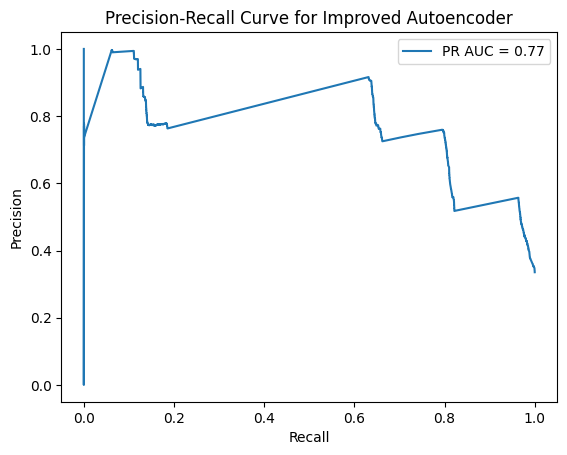

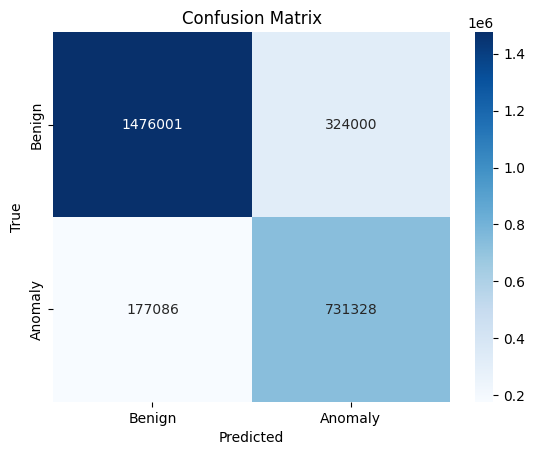

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
import random
import os

# Assuming df_combined_scaled is your DataFrame already prepared with features and labels
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = '42'
# Define the selected features
selected_features = [
    'Dst Port',
    'Bwd Pkt Len Min',
    'Bwd Pkt Len Mean',
    'Bwd Pkts/s',
    'Pkt Len Min',  # Matched 'Min Packet Length' with 'Pkt Len Min'
    'PSH Flag Cnt',  # Matched 'PSH Flag Count' with 'PSH Flag Cnt'
    'URG Flag Cnt',  # Matched 'URG Flag Count' with 'URG Flag Cnt'
    'Fwd Seg Size Avg',  # Matched 'Avg Fwd Segment Size' with 'Fwd Seg Size Avg'
    'Bwd Seg Size Avg',  # Matched 'Avg Bwd Segment Size' with 'Bwd Seg Size Avg'
    'Fwd Seg Size Min',
    'Date'  # Matched 'min_seg_size_forward' with 'Fwd Seg Size Min'
]

# Extract unique dates
dates = df_combined_scaled['Date'].unique()

# Initialize containers for training and testing data
train_data = []
test_data = []

# Iterate over each date and sample 10% for training and the rest for testing
for date in dates:
    # Filter data for the current date
    date_data = df_combined_scaled[df_combined_scaled['Date'] == date]

    # Separate Benign (0) and Anomaly (1)
    benign_data = date_data[date_data['Label'] == 0]
    anomaly_data = date_data[date_data['Label'] == 1]

    # Sample 10% of each category for training
    benign_train = benign_data.sample(frac=0.1, random_state=42)
    anomaly_train = anomaly_data.sample(frac=0.1, random_state=42)

    # Remaining data for testing
    benign_test = benign_data.drop(benign_train.index)
    anomaly_test = anomaly_data.drop(anomaly_train.index)

    # Append to train and test containers
    train_data.append(pd.concat([benign_train, anomaly_train]))
    test_data.append(pd.concat([benign_test, anomaly_test]))

# Combine all sampled data into single train and test datasets
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

# Separate features (X) and labels (y)
X_train = train_data[selected_features].drop(columns=['Date'])
y_train = train_data['Label'].values

X_test = test_data[selected_features].drop(columns=['Date'])
y_test = test_data['Label'].values

# Scale features (if not already done)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the autoencoder

# Filter only benign examples for training the autoencoder
X_train_benign = X_train_scaled[y_train == 0]

# Build a more complex autoencoder
input_dim = X_train_benign.shape[1]
encoding_dim = 24  # Adjust encoding dimension for complexity

autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(encoding_dim * 3),  # Increased complexity
    tf.keras.layers.LeakyReLU(alpha=0.3),  # LeakyReLU for better performance
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Dense(encoding_dim * 2),
    tf.keras.layers.LeakyReLU(alpha=0.3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(encoding_dim),
    tf.keras.layers.LeakyReLU(alpha=0.3),
    tf.keras.layers.Dense(encoding_dim * 2),
    tf.keras.layers.LeakyReLU(alpha=0.3),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')  # Output layer
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Set up early stopping to avoid overfitting and reduce training time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with reduced epochs and early stopping
history = autoencoder.fit(
    X_train_benign, X_train_benign,
    epochs=30,  # Reduced epochs
    batch_size=256,  # Larger batch size for faster training
    shuffle=True,
    validation_split=0.1,
    callbacks=[early_stopping]  # Early stopping callback
)

# Compute reconstruction error on test set
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

# Adjust threshold to improve recall
threshold = np.percentile(mse[y_test == 0], 82)

# Predict anomalies based on reconstruction error
y_pred_custom = [1 if error > threshold else 0 for error in mse]

# Evaluate the model
print("Classification Report with Improved Autoencoder Anomaly Detection:")
print(classification_report(y_test, y_pred_custom, target_names=["Benign", "Anomaly"]))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, mse)
print(f"ROC AUC: {roc_auc:.2f}")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, mse)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Improved Autoencoder")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Anomaly"], yticklabels=["Benign", "Anomaly"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Assuming 'df_combined_scaled' contains the 'Date' column and has already been split into train and test sets

# Step 1: Extract the indices for the test set from the original DataFrame
test_indices = test_data.index  # Test set indices

# Step 2: Extract the corresponding 'Date' values for the test set
# Use the 'Date' column directly from the test_data to avoid misalignment
dates_for_test = test_data['Date'].reset_index(drop=True)

# Step 3: Create a DataFrame for X_test using the original feature names
# Ensure column names from the training dataset are preserved
output_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # Correct feature column names
output_df['Date'] = dates_for_test  # Add the correct dates to the DataFrame
output_df['Anomaly_Prediction'] = y_pred_custom  # Add predictions
output_df['True_Label'] = y_test  # Add true labels for evaluation

# Step 4: Calculate precision, recall, and F1-score for Benign (0) and Anomaly (1)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_custom, labels=[0, 1])

# Step 5: Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Class': ['Benign', 'Anomaly'],
    'Precision': precision,
    'Recall': recall,
    'F1_Score': f1_score
})

# Step 6: Save the predictions and metrics to separate CSV files
output_file_predictions = "anomaly_predictions.csv"
output_file_metrics = "anomaly_detection_metrics.csv"

# Save predictions with dates and true labels
output_df.to_csv(output_file_predictions, index=False)

# Save metrics
metrics_df.to_csv(output_file_metrics, index=False)

print(f"Predictions saved to {output_file_predictions}")
print(f"Metrics saved to {output_file_metrics}")

# Step 7: Validate the output
# Ensure all 5 dates are present in the output DataFrame
print("Unique Dates in Output DataFrame:")
print(output_df['Date'].value_counts())


Predictions saved to anomaly_predictions.csv
Metrics saved to anomaly_detection_metrics.csv
Unique Dates in Output DataFrame:
Date
2018-02-16    754117
2018-03-02    619091
2018-02-15    518671
2018-02-22    497324
2018-02-28    319212
Name: count, dtype: int64


Classification Report for Isolation Forest Anomaly Detection:
              precision    recall  f1-score   support

      Benign       0.67      0.84      0.75   1800001
     Anomaly       0.36      0.17      0.24    908414

    accuracy                           0.62   2708415
   macro avg       0.52      0.51      0.49   2708415
weighted avg       0.57      0.62      0.58   2708415

ROC AUC: 0.31


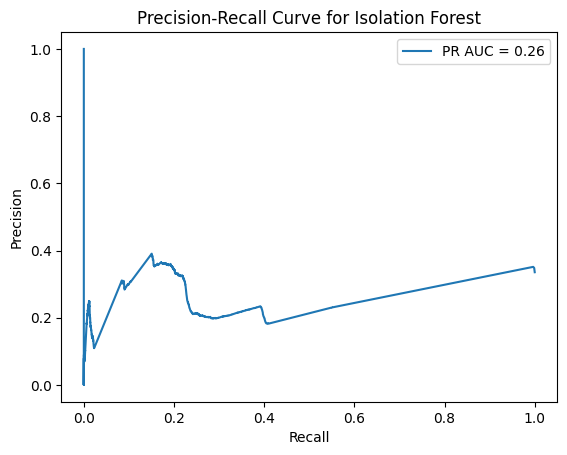

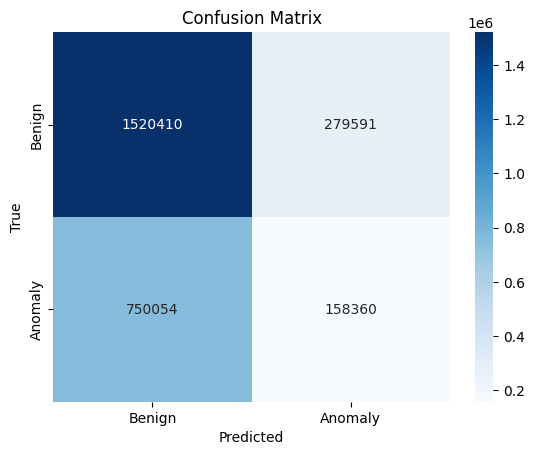

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train an Isolation Forest on the training set
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
iso_forest.fit(X_train)  # Use the entire training set

# Compute anomaly scores for the test set
test_scores = iso_forest.decision_function(X_test)  # Anomaly scores
test_preds = iso_forest.predict(X_test)

# Convert Isolation Forest predictions to match the y_test format:
# -1 for anomaly is converted to 1 (anomaly), and 1 (normal) is converted to 0 (benign)
y_pred_iso = np.where(test_preds == -1, 1, 0)

# Evaluate the Isolation Forest model
print("Classification Report for Isolation Forest Anomaly Detection:")
print(classification_report(y_test, y_pred_iso, target_names=["Benign", "Anomaly"]))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, test_scores * -1)  # Multiply by -1 because higher scores indicate normality
print(f"ROC AUC: {roc_auc:.2f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, test_scores * -1)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Isolation Forest")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_iso)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Anomaly"], yticklabels=["Benign", "Anomaly"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:
X_test_indices = X_test.index  # Indices of the test set
dates_for_test = test_data['Date'].reset_index(drop=True)

# Create a DataFrame with predictions and other details
output_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # Correct feature column names
output_df['Date'] = dates_for_test  # Add the correct dates to the DataFrame
output_df['Anomaly_Prediction'] = y_pred_iso  # Add predictions
output_df['True_Label'] = y_test

# Save the resulting DataFrame to CSV
output_file_iso = "anomaly_prediction_iso_forest.csv"
output_df.to_csv(output_file_iso, index=False)
print(f"Predictions with Date saved to {output_file_iso}")

Predictions with Date saved to anomaly_prediction_iso_forest.csv
